In [ ]:
import pandas as pd
import numpy as np
df1= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
new_df = df1.drop(columns= ['date', 'lights'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns )
appliance_target = normalized_df['Appliances']
feature_df = normalized_df.drop(columns = ['Appliances'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_df, appliance_target, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_value = linear_model.predict(x_test)

#mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_value)
round (mae, 3)

0.05

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_value)
round(r2_score, 3)

0.149

In [ ]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_value))
round(rss, 3)

45.348

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_value))
round(rmse, 3)

0.088

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weight_df = pd.DataFrame(weights).reset_index()
  weight_df.columns = ['Feature', col_name]
  weight_df[col_name].round(3)
  return weight_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weight_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weight_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

final_weight = pd.merge(linear_model_weights, ridge_weight_df, on = 'Feature')
final_weight = pd.merge(final_weight, lasso_weight_df, on = 'Feature')
final_weight

,Feature,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


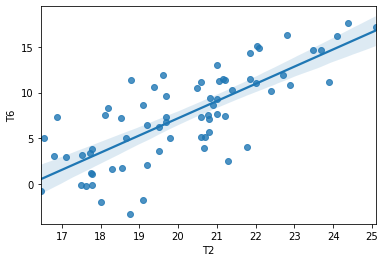

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

#Select a sample of dataset
simpler_linear_reg_df1 = df1[['T2', 'T6']].sample(70, random_state=42)
#regression plot
sns.regplot(x='T2', y='T6', data=simpler_linear_reg_df1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
new_df = df1.drop(columns= ['date', 'lights'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns )
target = normalized_df['T6']
feature_df = normalized_df[['T2']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_value = linear_model.predict(x_test)

# Q12 r2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_value)
round(r2_score, 2)

0.64

In [ ]:
# Q13 mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_value)
round (mae, 2)

0.08

In [ ]:
# Q14 rss
import numpy as np
rss = np.sum(np.square(y_test - predicted_value))
round(rss, 2)

66.12

In [ ]:
# Q15 rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_value))
round(rmse, 3)


0.106

In [ ]:
# Q16 r2_score(coefficient of determination)
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_value)
round(r2_score, 2)

0.64

In [ ]:
# Q18 ridge reg
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# Q19 lasso reg
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weight_df = pd.DataFrame(weights).reset_index()
  weight_df.columns = ['Feature', col_name]
  weight_df[col_name].round(3)
  return weight_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weight_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weight_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

final_weight = pd.merge(linear_model_weights, ridge_weight_df, on = 'Feature')
final_weight = pd.merge(final_weight, lasso_weight_df, on = 'Feature')
final_weight

,Feature,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,T2,0.891077,0.890064,0.85178
